## Extrae la informacion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

df = pd.read_excel(r"D:\alex_\Documents\Programacion\Bases de datos\Loteria Nacional\GanaGato\GanaGato_12022024.xlsx", dtype=object)

## Obten tu df

In [2]:
# premios_a_filtrar = [1200, 5000, 10000]
# df_filtrado = df[~df['PREMIO'].isin(premios_a_filtrar)]
# df_pivot_todos = df_filtrado.pivot_table(index = "ORIGEN",columns="PREMIO", values = "Valor", aggfunc=lambda x: x).reset_index()
# df_pivot_todos["ORIGEN"] = df_pivot_todos["ORIGEN"].str.replace('Mayor', '')

df.head()

,NPRODUCTO,CONCURSO,F1,F2,F3,F4,F5,F6,F7,F8,BOLSA,FECHA
0,20,2656,1,1,4,2,2,3,5,5,323000,2024-02-10
1,20,2655,4,3,1,4,4,3,3,4,303000,2024-02-08
2,20,2654,1,2,3,2,3,2,2,1,302000,2024-02-06
3,20,2653,3,4,5,1,2,1,2,4,301000,2024-02-03
4,20,2652,4,1,2,2,2,5,3,1,300000,2024-02-01


## Grafica de los mas importantes

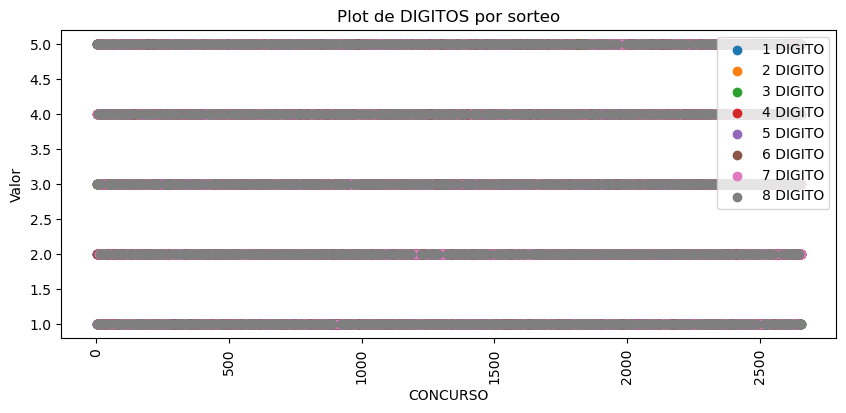

In [3]:
plt.figure(figsize=(10, 4))

plt.scatter(df["CONCURSO"], df["F1"], label = "1 DIGITO")
plt.scatter(df["CONCURSO"], df["F2"], label = "2 DIGITO")
plt.scatter(df["CONCURSO"], df["F3"], label = "3 DIGITO")
plt.scatter(df["CONCURSO"], df["F4"], label = "4 DIGITO")
plt.scatter(df["CONCURSO"], df["F5"], label = "5 DIGITO")
plt.scatter(df["CONCURSO"], df["F6"], label = "6 DIGITO")
plt.scatter(df["CONCURSO"], df["F7"], label = "7 DIGITO")
plt.scatter(df["CONCURSO"], df["F8"], label = "8 DIGITO")


plt.xlabel('CONCURSO')
plt.xticks(rotation=90)
plt.ylabel('Valor')
plt.title('Plot de DIGITOS por sorteo')
plt.legend()
plt.show()

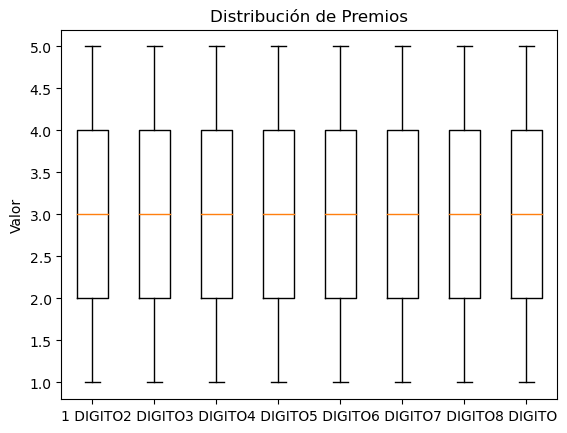

In [4]:
# df_pivot_todos.boxplot(column=[300000, 850000, 7000000])
plt.boxplot([df["F1"], 
             df["F2"],
             df["F3"],
             df["F4"],
             df["F5"],
             df["F6"],
             df["F7"],
             df["F8"],
             ], labels=["1 DIGITO",
                        "2 DIGITO",
                        "3 DIGITO",
                        "4 DIGITO",
                        "5 DIGITO",
                        "6 DIGITO",
                        "7 DIGITO",
                        "8 DIGITO"])

plt.title('Distribución de Premios')
plt.ylabel('Valor')
plt.show()

## Analisis

1. Árboles de Decisión y Bosques Aleatorios:
Pueden adaptarse a patrones no lineales y son robustos frente a datos ruidosos. Los bosques aleatorios, en particular, pueden mejorar la precisión y generalización.
2. Redes Neuronales:
Especialmente las redes neuronales recurrentes (RNN) y las redes neuronales de memoria a largo plazo (LSTM) son eficaces para modelar secuencias temporales y pueden capturar patrones complejos y relaciones no lineales.
3. Modelos de Serie Temporal:
Modelos específicos para series temporales, como ARIMA o modelos LSTM, son diseñados específicamente para la predicción de series temporales y pueden ser efectivos en la identificación de patrones temporales.

In [5]:
df1 = df.iloc[1:200, 1:10]
df1

,CONCURSO,F1,F2,F3,F4,F5,F6,F7,F8
1,2655,4,3,1,4,4,3,3,4
2,2654,1,2,3,2,3,2,2,1
3,2653,3,4,5,1,2,1,2,4
4,2652,4,1,2,2,2,5,3,1
5,2651,3,4,2,4,1,2,2,3
...,...,...,...,...,...,...,...,...,...
195,2461,1,3,4,1,1,2,2,3
196,2460,5,3,5,2,2,2,4,1
197,2459,2,5,1,3,2,3,2,1
198,2458,1,3,4,2,3,5,3,2


## Random Forest

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Crear una lista de los nombres de las columnas de los dígitos
digit_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8']

#################################################
df_analisis = df1
proximo_premio = df1["CONCURSO"][1]+1 # cORREGIR ACA
#################################################

# Crear un gráfico para cada dígito
for digit_column in digit_columns:
    years = np.array(df_analisis["CONCURSO"].astype(int))
    target_variable = df_analisis[digit_column]

    X = years.reshape(-1, 1)
    y = target_variable

    # Modelo de Random Forest
    rf_model = RandomForestRegressor(n_estimators=200, random_state=1000)
    rf_model.fit(X, y)

    # Predicción para el tiempo futuro
    X_future = np.array([[proximo_premio]])
    y_pred_future = rf_model.predict(X_future)

    # Predicciones del modelo
    y_pred = rf_model.predict(X)

    # # Crear el gráfico
    # plt.figure(figsize=(12, 6))

    # # Variable objetivo real: X
    # plt.scatter(X.flatten(), y, label='Real', color='blue')

    # # Predicciones del modelo de Random Forest
    # plt.plot(X.flatten(), y_pred, label='Predicción Random Forest', color='green')

    # # Predicción para el tiempo futuro
    # plt.scatter(X_future.flatten(), y_pred_future, label='Predicción Año Futuro', color='red', marker='X', s=100)

    # plt.xlabel('Año')
    # plt.ylabel('Variable Objetivo')
    # plt.title(f'Random Forest respecto al Tiempo - Dígito {digit_column[-1]}')
    # plt.legend()
    # plt.show()

    # print("############")
    print(" ")
    print(f'Predicción para el Digito {digit_column[-1]} Futuro: {y_pred_future[0]}')
    # Desviacion, entre mas cercana a 0 mejor
    # mse = mean_squared_error(y , y_pred)
    # rmse = sqrt(mse)
    # print(f'Root Mean Squared Error (RMSE): {rmse}')

    # # R cuadrado entre mas cercano a 1 mejor
    # r2 = r2_score(y , y_pred)
    # print(f'R^2 Score: {r2}')
    # print(" ")



 
Predicción para el Digito 1 Futuro: 3.12
 
Predicción para el Digito 2 Futuro: 2.78
 
Predicción para el Digito 3 Futuro: 2.03
 
Predicción para el Digito 4 Futuro: 3.05
 
Predicción para el Digito 5 Futuro: 3.44
 
Predicción para el Digito 6 Futuro: 2.59
 
Predicción para el Digito 7 Futuro: 2.625
 
Predicción para el Digito 8 Futuro: 3.1


## ARMA

c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


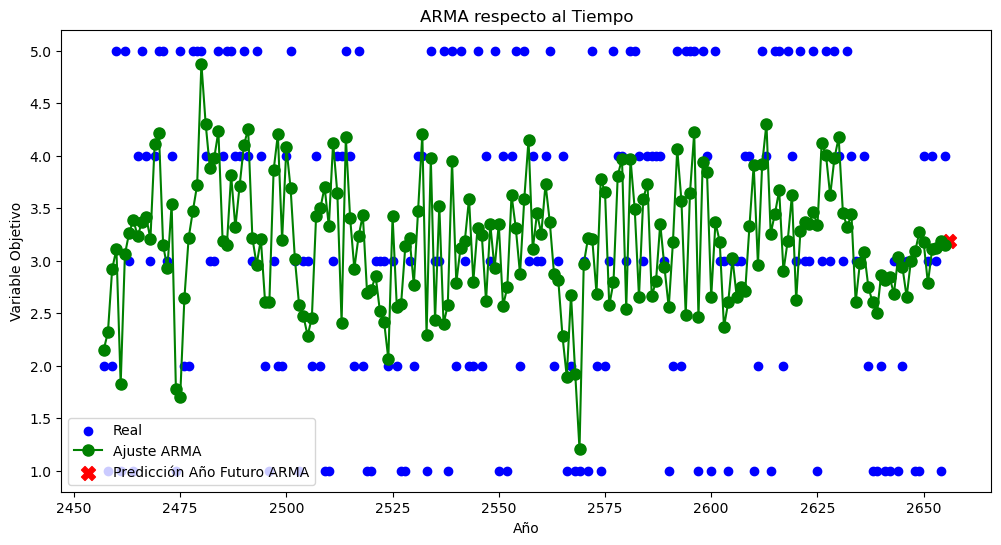

############
 
Predicción para el Digito 1 Futuro: 3.1841240823271266
Root Mean Squared Error (RMSE): 1.253887435593246
R^2 Score: 0.1993463968058492
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


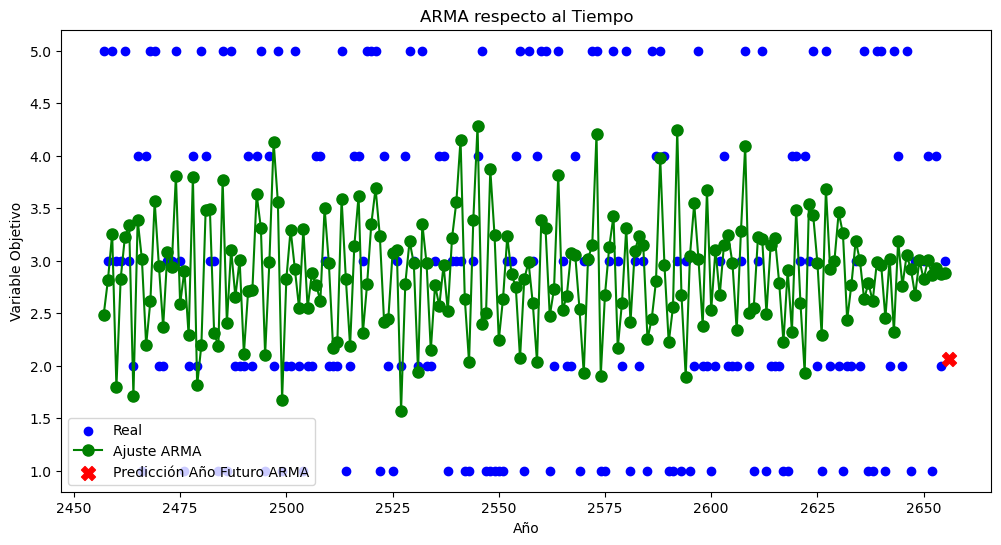

############
 
Predicción para el Digito 2 Futuro: 2.0612279713572352
Root Mean Squared Error (RMSE): 1.3182883533072607
R^2 Score: 0.13180331134326995
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


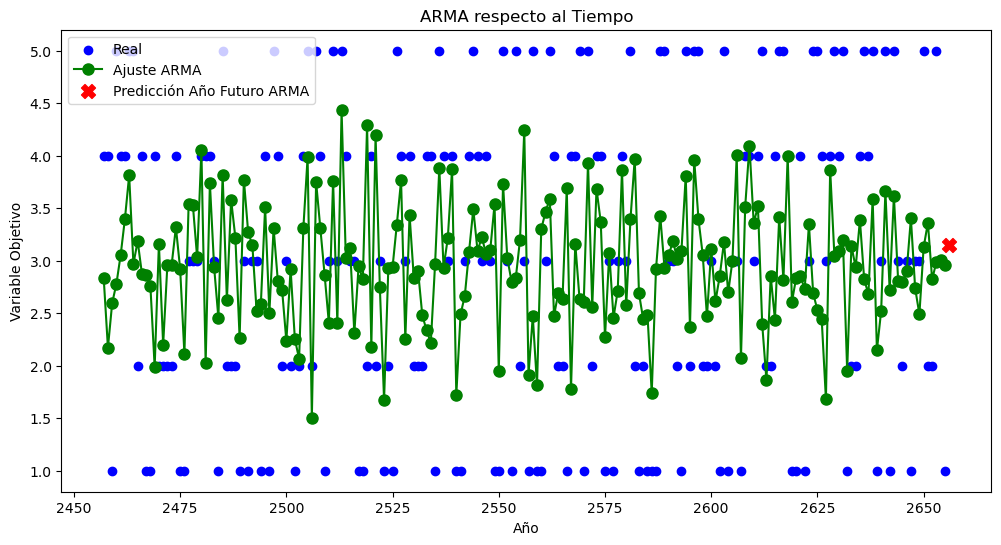

############
 
Predicción para el Digito 3 Futuro: 3.153474803321035
Root Mean Squared Error (RMSE): 1.308958125707908
R^2 Score: 0.16773520330075653
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


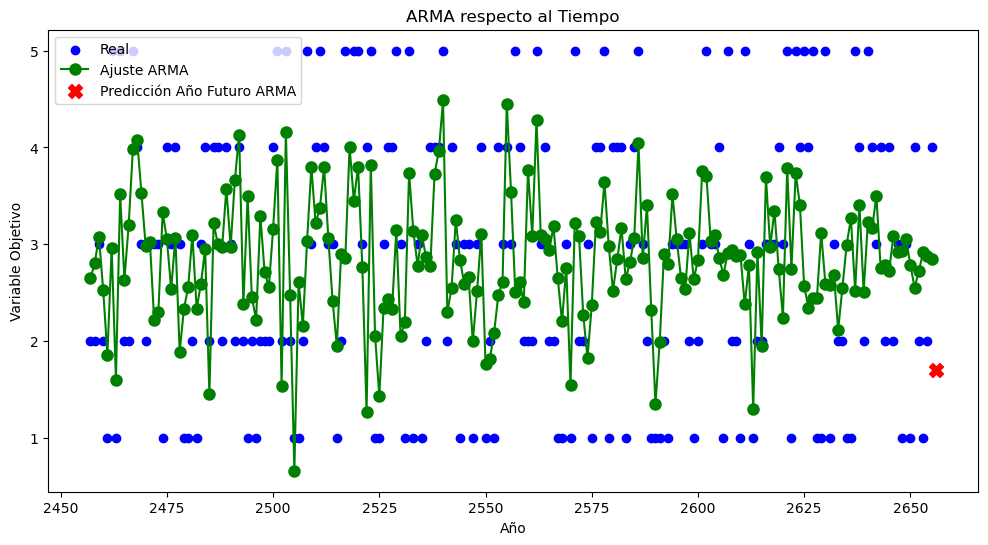

############
 
Predicción para el Digito 4 Futuro: 1.7033382450761059
Root Mean Squared Error (RMSE): 1.1892889347328568
R^2 Score: 0.23275467164566876
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


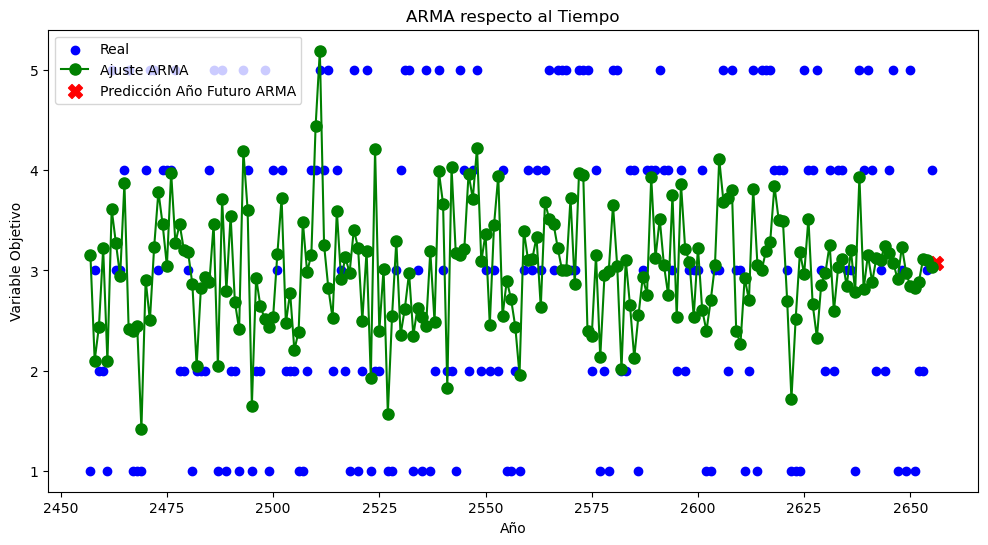

############
 
Predicción para el Digito 5 Futuro: 3.0777576797637343
Root Mean Squared Error (RMSE): 1.2860375673161302
R^2 Score: 0.18517290588777313
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


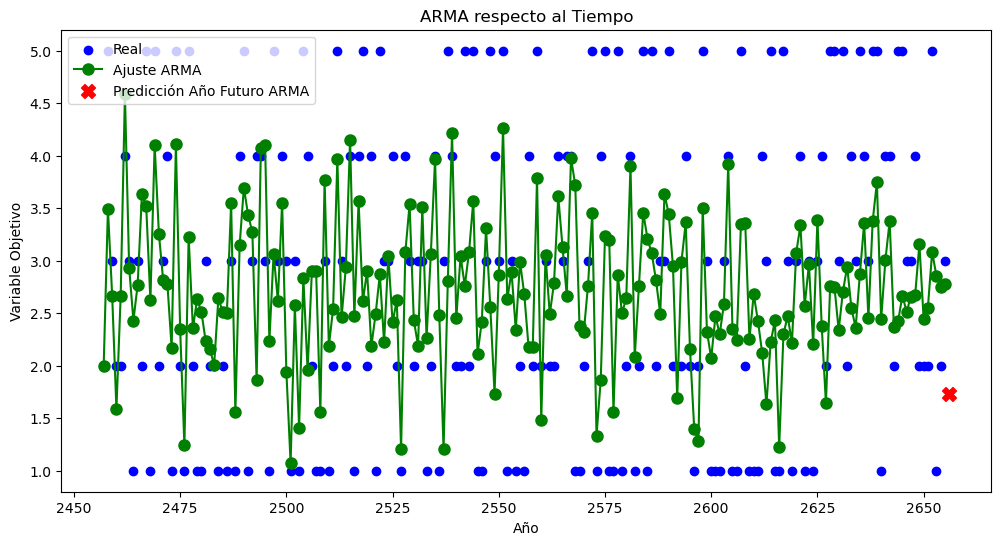

############
 
Predicción para el Digito 6 Futuro: 1.7333464193438881
Root Mean Squared Error (RMSE): 1.2538942197463605
R^2 Score: 0.23568411605997475
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


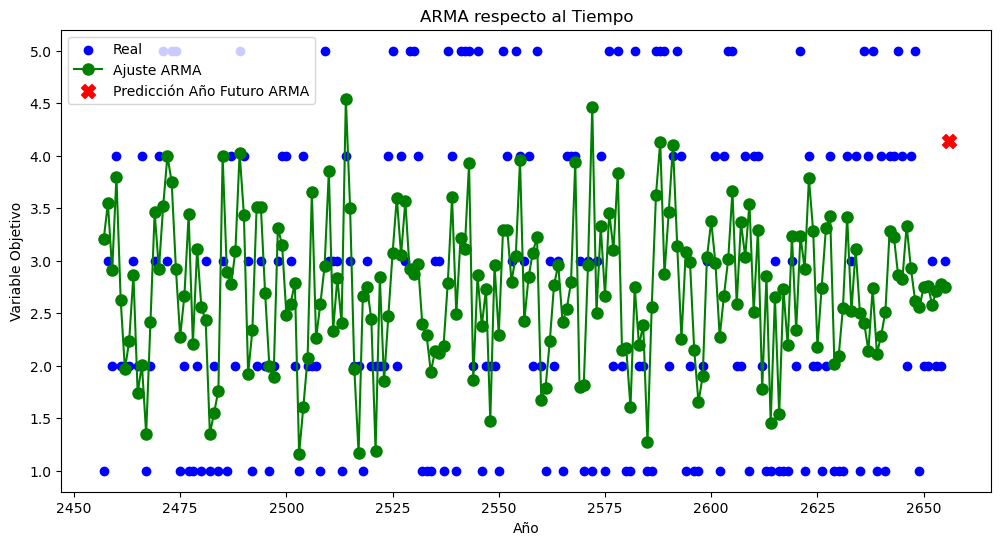

############
 
Predicción para el Digito 7 Futuro: 4.140669475384823
Root Mean Squared Error (RMSE): 1.233063547846969
R^2 Score: 0.22987861094776918
 


c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\alex_\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


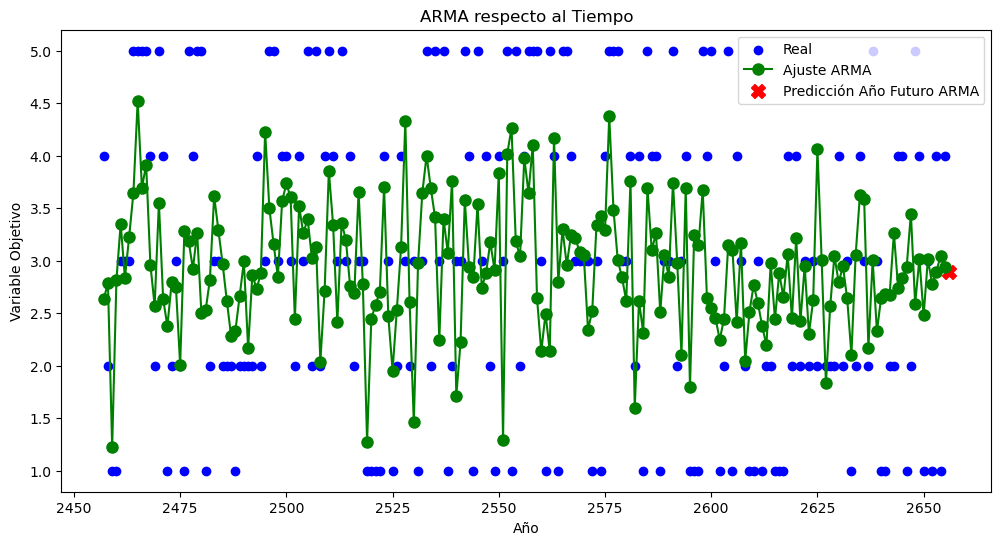

############
 
Predicción para el Digito 8 Futuro: 2.8955601217388565
Root Mean Squared Error (RMSE): 1.240525928181222
R^2 Score: 0.20513681736301248
 


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#################################################

df_analisis = df1
digit_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8']
order = (20, 0, 20) 
proximo_premio = df1["CONCURSO"][1]+1 # cORREGIR ACA

#################################################

# Crear un gráfico para cada dígito
for digit_column in digit_columns:
    years = np.array(df_analisis["CONCURSO"].astype(int))
    target_variable = df_analisis[digit_column].astype(int)

    X = years.reshape(-1, 1)
    y = target_variable

    # Modelo de Random Forest
    model_arma = ARIMA(y, order=order)
    result_arma = model_arma.fit()
    
    forecast_steps = 1
    forecast = result_arma.forecast(steps=forecast_steps)

    # Visualizar resultados
    plt.figure(figsize=(12, 6))

    # Variable objetivo real
    plt.scatter(X, y, label='Real', color='blue')

    # Predicciones del modelo ARIMA
    plt.plot(X, result_arma.fittedvalues , label='Ajuste ARMA', color='green', marker='o', markersize=8)

    # Predicciones para el tiempo futuro
    plt.scatter(proximo_premio, forecast, label='Predicción Año Futuro ARMA', color='red', marker='X', s=100)

    plt.xlabel('Año')
    plt.ylabel('Variable Objetivo')
    plt.title('ARMA respecto al Tiempo')
    plt.legend()
    plt.show()

    print("############")
    print(" ")
    print(f'Predicción para el Digito {digit_column[-1]} Futuro: {forecast.values[0]}')
    # Desviacion, entre mas cercana a 0 mejor
    mse = mean_squared_error(y , result_arma.fittedvalues)
    rmse = sqrt(mse)
    print(f'Root Mean Squared Error (RMSE): {rmse}')

    # R cuadrado entre mas cercano a 1 mejor
    r2 = r2_score(y , result_arma.fittedvalues)
    print(f'R^2 Score: {r2}')
    print(" ")